<a href="https://colab.research.google.com/github/dami-jung/Practice/blob/main/0122_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 0. Import Libraries

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
#warnings.filterwarnings(action='default')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install h5py

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import pickle
import gzip
import h5py

#### 1. Import dataset

In [5]:
with gzip.open('/content/drive/MyDrive/data/preprocessed.pickle','rb') as f:
    data = pickle.load(f)

In [6]:
data_ifft2 = data['data ifft']
data_real = data['data real value']
xgrid = data['x grid']
ygrid = data['y grid']
zgrid = data['z']
t = data['t']

In [7]:
# data_ifft2.shape (1866, 16, 32, 96)
# dataset at z = 0.000
data_2d = np.zeros((1866, 32, 96), dtype=complex)
for index in range(1866):
  data_2d[index] = data_ifft2[index][8]

In [8]:
time_slc = 10
linear_part = data_2d[:time_slc]
nonlinear_part = data_2d[time_slc:]
print(f"linear size: {linear_part.shape}, nonlinear size: {nonlinear_part.shape}")

linear size: (10, 32, 96), nonlinear size: (1856, 32, 96)


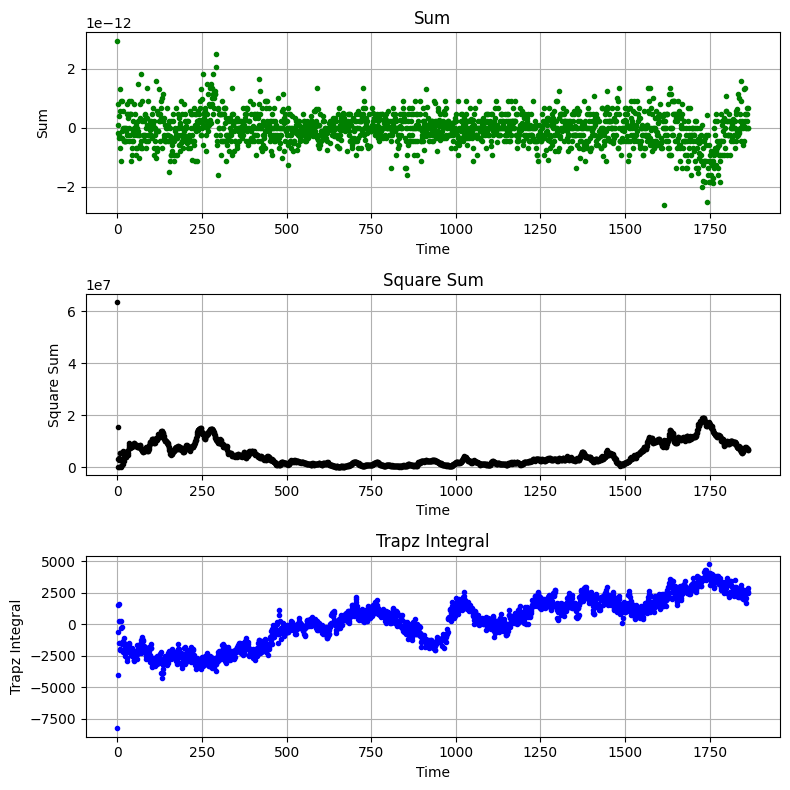

In [9]:
import scipy
import scipy.integrate

compute_integral = scipy.integrate.trapz

sum_int = [np.sum(array.real) for array in data_2d]
ssum_int = [np.sum(np.square(array).real) for array in data_2d]
trapz_int = [compute_integral(compute_integral(array)).real for array in data_2d]

figure = plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(np.arange(len(data_2d)), sum_int, 'g.')
#plt.plot(np.arange(len(data_2d)), sum_int, 'g-', alpha=0.5)
#plt.xticks(np.arange(len(data_2d)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Sum')
plt.xlabel('Time')
plt.title('Sum')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(np.arange(len(data_2d)), ssum_int, 'k.')
#plt.plot(np.arange(len(data_2d)), ssum_int, 'k-', alpha=0.5)
#plt.xticks(np.arange(len(data_2d)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Square Sum')
plt.xlabel('Time')
plt.title('Square Sum')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(data_2d)), trapz_int, 'b.')
#plt.plot(np.arange(len(data_2d)), trapz_int, 'b-', alpha=0.5)
#plt.xticks(np.arange(len(data_2d)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Trapz Integral')
plt.xlabel('Time')
plt.title('Trapz Integral')
plt.grid()

plt.tight_layout()

In [10]:
import scipy
import scipy.integrate

compute_integral = scipy.integrate.trapz

sum_int = [np.sum(array.real) for array in linear_part]
ssum_int = [np.sum(np.square(array).real) for array in linear_part]
trapz_int = [compute_integral(compute_integral(array)).real for array in linear_part]

figure = plt.figure(figsize=(6, 8))
plt.subplot(3, 1, 1)
plt.plot(np.arange(len(linear_part)), sum_int, 'go')
plt.plot(np.arange(len(linear_part)), sum_int, 'g-', alpha=0.5)
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Sum')
plt.xlabel('Time')
plt.title('Sum')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(np.arange(len(linear_part)), ssum_int, 'ko')
plt.plot(np.arange(len(linear_part)), ssum_int, 'k-', alpha=0.5)
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Square Sum')
plt.xlabel('Time')
plt.title('Square Sum')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(linear_part)), trapz_int, 'bo')
plt.plot(np.arange(len(linear_part)), trapz_int, 'b-', alpha=0.5)
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Trapz Integral')
plt.xlabel('Time')
plt.title('Trapz Integral')
plt.grid()

plt.tight_layout()

#### 2. Apply PyDMD

In [11]:
!pip install pydmd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 2.7 MB/s eta 0:00:00


In [12]:
# If needed
!git clone https://github.com/dynamicslab/pysindy.git
!pip install pysindy/.

Cloning into 'pysindy'...
remote: Enumerating objects: 12102, done.
remote: Counting objects: 100% (4329/4329), done.
remote: Compressing objects: 100% (1523/1523), done.
remote: Total 12102 (delta 2930), reused 4108 (delta 2789), pack-reused 7773
Receiving objects: 100% (12102/12102), 915.91 MiB | 21.06 MiB/s, done.
Resolving deltas: 100% (7754/7754), done.
Updating files: 100% (495/495), done.
Processing ./pysindy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysindy: filename=pysindy-1.7.6.dev137+ga7eb890-py3-none-any.whl size=116899 sha256=a5fc93901f4fb36cd45f731b50c6b48e80fc9f33a34c282d6d49f410ed8836a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-6j448y7l/wheels/b6/c1/45/114d8c97b6dbc096d5b9279eb09c8c11b35045c32f14492f1c
Successfully built pysindy


In [13]:
import numpy as np
import scipy
import scipy.integrate
from scipy.stats import pearsonr

from matplotlib import animation
import pandas as pd

from IPython.display import HTML
from matplotlib import pyplot as plt
from pydmd import DMD
from pydmd import MrDMD
# If needed
#import pysindy as ps

In [14]:
print(data_2d.shape)

# Data_2d: (1866, 32, 96)
# Test_data: (1866, 3072)
# 1866 time step, (16, 32, 96) array
test_data = np.zeros((1866, 32*96), dtype=complex)
index = 0

for arr in data_2d: # data_2d.shape: (96, 32, 1866)
  test_data[index] = arr.flatten()
  index += 1

(1866, 32, 96)


In [15]:
time_slc = 5
linear_part = data_2d[:time_slc]
nonlinear_part = data_2d[time_slc:]
print(f"linear size: {linear_part.shape}, nonlinear size: {nonlinear_part.shape}")

linear size: (5, 32, 96), nonlinear size: (1861, 32, 96)


In [16]:
dmd_linear = DMD(svd_rank=10, tlsq_rank=100, exact=True, opt=True)
dmd_linear.fit(X=test_data[:time_slc].T)
l_modes = dmd_linear.modes
l_dynamics = dmd_linear.dynamics
l_rct = dmd_linear.reconstructed_data
print(f"modes shape {l_modes.shape}, dynamics shape {l_dynamics.shape}, reconstructed to {l_rct.shape}")

modes shape (3072, 4), dynamics shape (4, 5), reconstructed to (3072, 5)


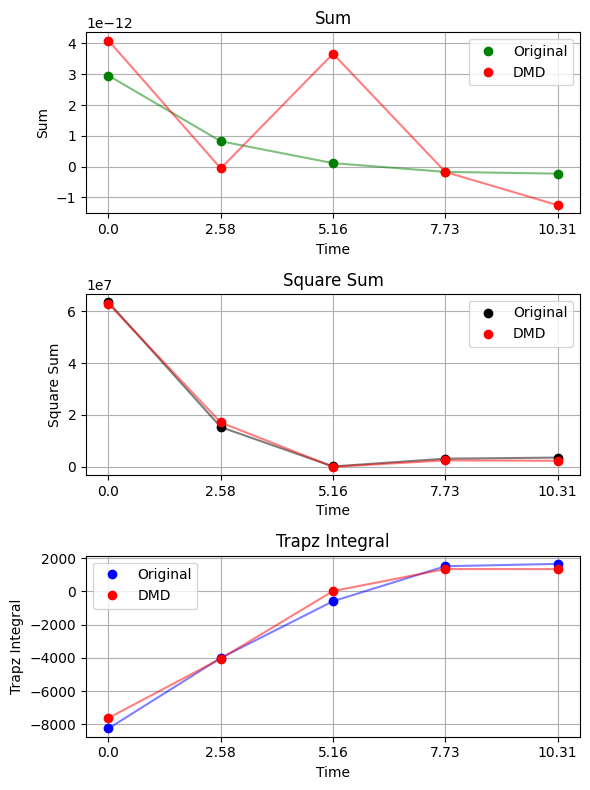

In [ ]:
import scipy
import scipy.integrate

compute_integral = scipy.integrate.trapz

sum_int = [np.sum(array.real) for array in linear_part]
ssum_int = [np.sum(np.square(array).real) for array in linear_part]
trapz_int = [compute_integral(compute_integral(array)).real for array in linear_part]
dmd_sum = [np.sum(array.real) for array in l_rct.T]
dmd_ssum = [np.sum(np.square(array).real) for array in l_rct.T]
dmd_states = [state.reshape((32, 96)) for state in l_rct.T] # (time_slc, 3072)
dmd_trapz = [compute_integral(compute_integral(state)).real for state in dmd_states]

figure = plt.figure(figsize=(6, 8))
plt.subplot(3, 1, 1)
plt.plot(np.arange(len(linear_part)), sum_int, 'go', label='Original')
plt.plot(np.arange(len(linear_part)), sum_int, 'g-', alpha=0.5)
plt.plot(np.arange(len(linear_part)), dmd_sum, 'ro', label='DMD')
plt.plot(np.arange(len(linear_part)), dmd_sum, 'r-', alpha=0.5)
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Sum')
plt.xlabel('Time')
plt.title('Sum')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(np.arange(len(linear_part)), ssum_int, 'ko', label='Original')
plt.plot(np.arange(len(linear_part)), ssum_int, 'k-', alpha=0.5)
plt.plot(np.arange(len(linear_part)), dmd_ssum, 'ro', label='DMD')
plt.plot(np.arange(len(linear_part)), dmd_ssum, 'r-', alpha=0.5)
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Square Sum')
plt.xlabel('Time')
plt.title('Square Sum')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(linear_part)), trapz_int, 'bo', label='Original')
plt.plot(np.arange(len(linear_part)), trapz_int, 'b-', alpha=0.5)
plt.plot(np.arange(len(linear_part)), dmd_trapz, 'ro', label='DMD')
plt.plot(np.arange(len(linear_part)), dmd_trapz, 'r-', alpha=0.5)
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 2))
plt.ylabel('Trapz Integral')
plt.xlabel('Time')
plt.title('Trapz Integral')
plt.legend()
plt.grid()

plt.tight_layout()

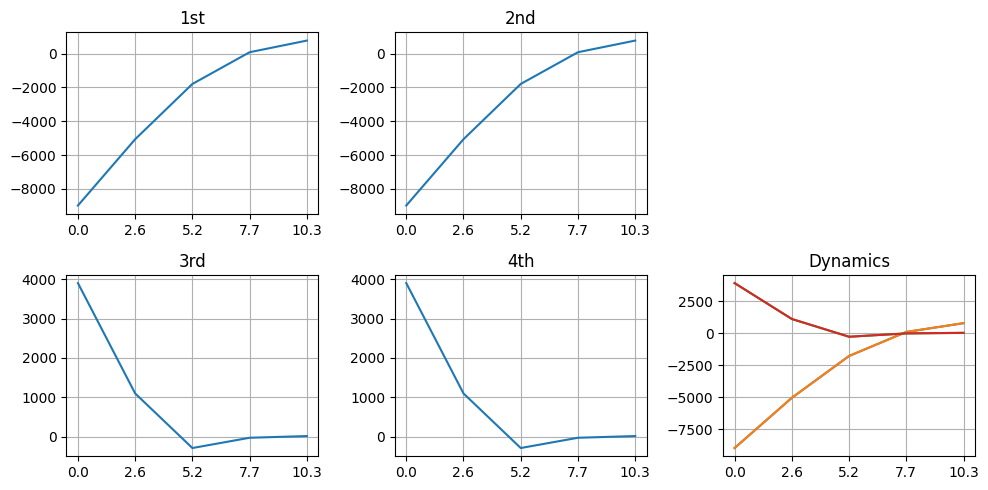

In [ ]:
###################################
#            Dynamics             #
###################################
figure = plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.plot(np.arange(time_slc), l_dynamics[0])
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 1))
plt.title("1st")
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(np.arange(time_slc), l_dynamics[1])
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 1))
plt.title("2nd")
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(np.arange(time_slc), l_dynamics[2])
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 1))
plt.title("3rd")
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(np.arange(time_slc), l_dynamics[3])
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 1))
plt.title("4th")
plt.grid()

plt.subplot(2, 3, 6)
plt.plot(np.arange(time_slc), l_dynamics.T)
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 1))
plt.title("Dynamics")
plt.grid()

plt.tight_layout()

Text(0.5, 1.0, '4th mode')

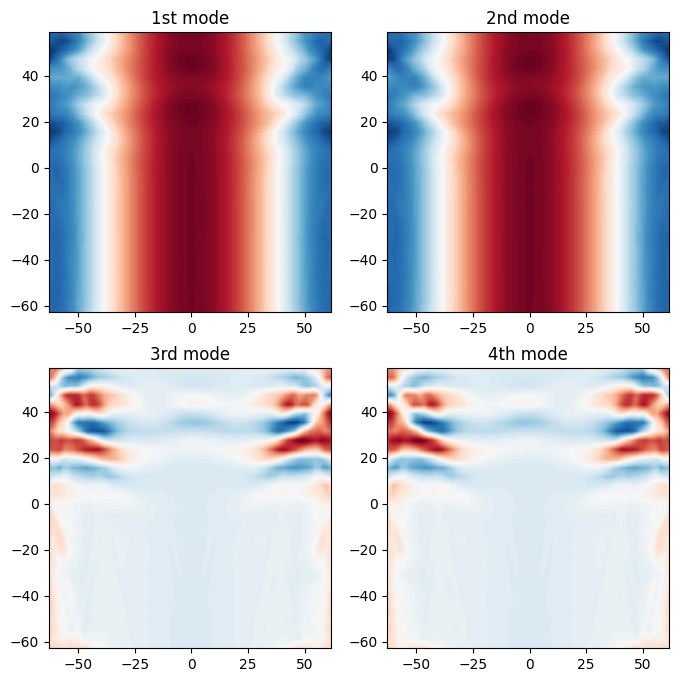

In [ ]:
###################################
#              Modes              #
###################################
figure = plt.figure(figsize=(8, 8))

modes = [state.reshape((32, 96)) for state in l_modes.T] # (time_slc, 3072)
modes = np.array(modes)

plt.subplot(2, 2, 1)
plt.contourf(xgrid, ygrid, modes[0], 100, cmap="RdBu_r")
plt.title("1st mode")

plt.subplot(2, 2, 2)
plt.contourf(xgrid, ygrid, modes[1], 100, cmap="RdBu_r")
plt.title("2nd mode")

plt.subplot(2, 2, 3)
plt.contourf(xgrid, ygrid, modes[2], 100, cmap="RdBu_r")
plt.title("3rd mode")

plt.subplot(2, 2, 4)
plt.contourf(xgrid, ygrid, modes[3], 100, cmap="RdBu_r")
plt.title("4th mode")

In [ ]:
####################################
# Apply SINDy to obtained dynamics #
####################################

#fourier_library = ps.FourierLibrary(n_frequencies=2)
linear_sindy = ps.SINDy()
print(linear_sindy)

timestep = np.arange(time_slc)

X = np.stack([l_dynamics.real[0], l_dynamics.real[2]])

linear_sindy.fit(X.T, t=timestep)
linear_sindy.print()

SINDy(differentiation_method=FiniteDifference(axis=-2),
      feature_library=PolynomialLibrary(), optimizer=STLSQ())
(x0)' = 973.612 1 + -0.730 x0 + -0.854 x1
(x1)' = -103.814 1 + 0.334 x0 + -0.119 x1


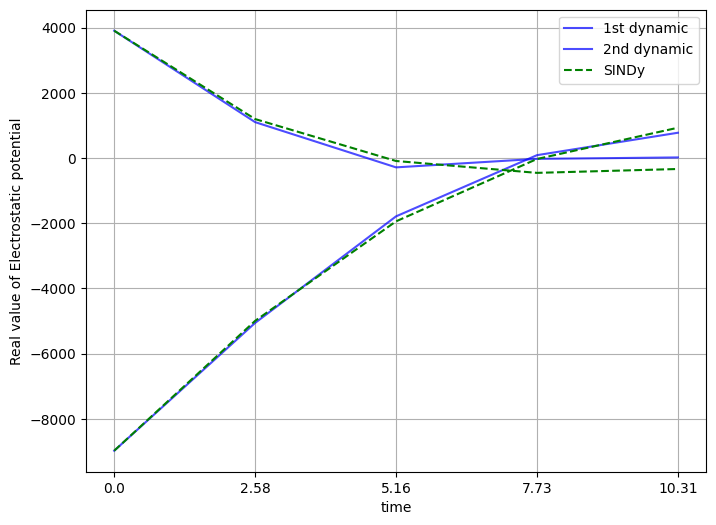

In [ ]:
x_model = linear_sindy.simulate(X.T[0, :], timestep)

plt.figure(figsize=(8, 6))
plt.plot(X[0, :], 'b-', alpha=0.7, label='1st dynamic')
plt.plot(X[1, :], 'b-', alpha=0.7, label='2nd dynamic')
plt.plot(x_model[:, 0], 'g--', label='SINDy')
plt.plot(x_model[:, 1], 'g--')
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 2))
plt.xlabel('time')
plt.ylabel('Real value of Electrostatic potential')
plt.legend()
plt.grid()
plt.show()

In [ ]:
nl_X = test_data[time_slc:].T # (3072, 1861)
nl_dynamics = (np.linalg.pinv(l_modes)@nl_X)
nl_dynamics.shape

(4, 1861)

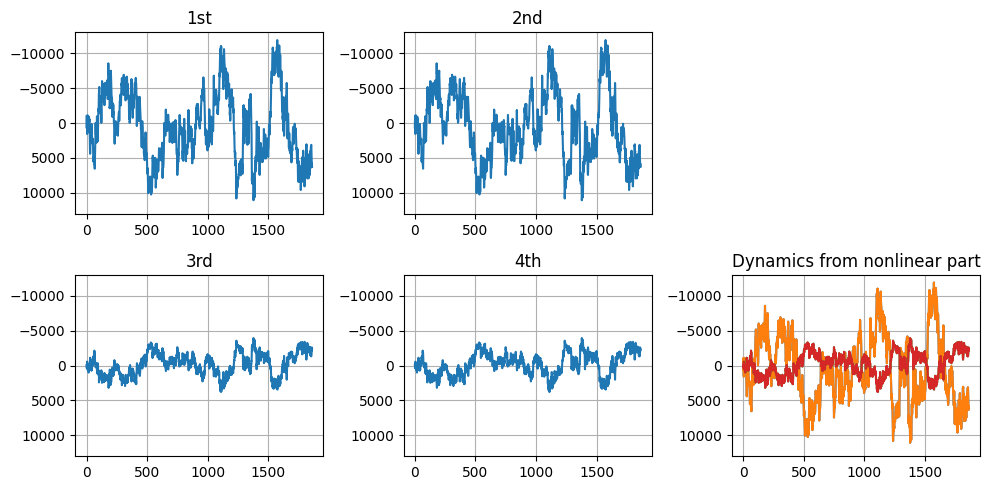

In [ ]:
#################################################################
# Dynamics of nonlinear part obtained with modes in linear part #
#################################################################
rsd = len(t) - time_slc
figure = plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.plot(np.arange(rsd), nl_dynamics[0])
#plt.xticks(np.arange(rsd), labels=np.round(t[time_slc:], 1))
plt.ylim(13e3, -13e3)
plt.title("1st")
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(np.arange(rsd), nl_dynamics[1])
#plt.xticks(np.arange(rsd), labels=np.round(t[time_slc:], 1))
plt.ylim(13e3, -13e3)
plt.title("2nd")
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(np.arange(rsd), nl_dynamics[2])
#plt.xticks(np.arange(rsd), labels=np.round(t[time_slc:], 1))
plt.ylim(13e3, -13e3)
plt.title("3rd")
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(np.arange(rsd), nl_dynamics[3])
#plt.xticks(np.arange(rsd), labels=np.round(t[time_slc:], 1))
plt.ylim(13e3, -13e3)
plt.title("4th")
plt.grid()

plt.subplot(2, 3, 6)
plt.plot(np.arange(rsd), nl_dynamics.T)
#plt.xticks(np.arange(rsd), labels=np.round(t[time_slc:], 1))
plt.ylim(13e3, -13e3)
plt.title("Dynamics from nonlinear part")
plt.grid()

plt.tight_layout()

##### Calculating Pearson correlation coefficient

['#fee2bb', '#fdc38d', '#fc8c59', '#e7533a', '#be0f0a']


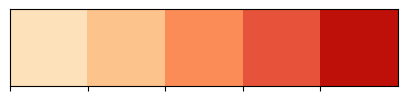

In [16]:
# for checking color map
import seaborn as sns

custom_palette = sns.color_palette("OrRd", 5)
sns.palplot(custom_palette)

print(sns.color_palette("OrRd", 5).as_hex())

왼쪽부터 Pearson correlation coefficient value
- 0\~0.2 (very low correlation)
- 0.2\~0.4 (low correlation)
- 0.4\~0.6 (moderate correlation)
- 0.6\~0.8 (high correlation)
- 0.8\~1.0 (very high correlation)

---
Data의 어떤 부분이 linear한지 nonlinear한지 판단할 수 있는 수치적인 기준에 대해서 찾아보다가 dynamics들 사이의 pearson correlation coefficient value를 계산해 보았습니다.
DMD를 적용하여 16개의 dynamics들을 구하고, 각 dynamics들끼리의 Pearson correlation value를 계산하여 pandas df로 plot 하였습니다. (제목마다 until time slice라고 표시해둔 부분은, 데이터의 처음 time step부터 time slice 값;index;까지의 데이터를 슬라이싱 하여 DMD를 적용하고 plotting 하였습니다)

Pearson correlation coefficient의 절댓값이 작다고 data가 nonlinear 하다는 증거가 되지는 못하지만, Pearson correlation coefficient은 strength of the linear association between two variables을 측정할 수 있기 때문에 계산해 보았습니다.

In [38]:
plt.figure(figsize=(10, 4))

X = np.stack([l_dynamics.real[0], l_dynamics.real[2]])

plt.suptitle("Correlation between 1st and 2nd dynamics")

plt.subplot(1, 2, 1)
plt.plot(X[0, :], 'b-', alpha=0.7, label='1st dynamic')
plt.plot(X[1, :], 'r-', alpha=0.7, label='2nd dynamic')
plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 2))
plt.xlabel('time')
plt.ylabel('Real value of Electrostatic potential')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(X[0, :], X[1, :], 'k-', label=f"Pearsonr {pearsonr(X[0, :], X[1, :]).statistic:.3f}")
plt.xlabel('1st dynamic')
plt.ylabel('2nd dynamic')
plt.legend()
plt.grid()

plt.tight_layout()
#plt.show()

In [17]:
import seaborn as sns

def draw_color(x):
    if abs(x) >= 0.8:
      color = 'background-color: #be0f0a'
      return color
    elif abs(x) >= 0.6:
      color = 'background-color:#e7533a'
      return color
    elif abs(x) >= 0.4:
      color = 'background-color:#fc8c59'
      return color
    elif abs(x) >= 0.2:
      color = 'background-color:#fdc38d'
      return color
    else:
      color = 'background-color:#fee2bb'
      return color

In [75]:
def draw_pearson_corr(start_idx, time_slc):

  linear_part = data_2d[start_idx:time_slc]

  dmd_linear = DMD(svd_rank=16, tlsq_rank=100, exact=True, opt=True)
  dmd_linear.fit(X=test_data[start_idx:time_slc].T)
  l_modes = dmd_linear.modes
  l_dynamics = dmd_linear.dynamics.real
  l_rct = dmd_linear.reconstructed_data

  plt.figure(figsize=(10, 4))

  plt.suptitle(f"Correlation of dynamics from t={np.round(t[start_idx], 2)} until t={np.round(t[time_slc-1], 2)}")

  ssum_int = [np.sum(np.square(array).real) for array in linear_part]
  dmd_ssum = [np.sum(np.square(array).real) for array in l_rct.T]

  plt.subplot(1, 2, 1)
  plt.plot(np.arange(start_idx, time_slc), ssum_int, 'ko', label='Original')
  plt.plot(np.arange(start_idx, time_slc), ssum_int, 'k-', alpha=0.5)
  plt.plot(np.arange(start_idx, time_slc), dmd_ssum, 'ro', label='Reconstruction after DMD')
  plt.plot(np.arange(start_idx, time_slc), dmd_ssum, 'r-', alpha=0.5)
  #plt.xticks(np.arange(time_slc), labels=np.round(t[:time_slc], 1))
  plt.ylabel('Square Sum')
  plt.xlabel('Time(index)')
  if time_slc-start_idx < 9:
    plt.xticks(range(start_idx, time_slc, 1))
  elif time_slc-start_idx < 21:
    plt.xticks(range(start_idx, time_slc, 2))
  elif time_slc-start_idx < 51:
    plt.xticks(range(start_idx, time_slc, 5))
  plt.title('Square Sum')
  plt.legend()
  plt.grid()

  plt.subplot(1, 2, 2)
  plt.plot(np.arange(start_idx, time_slc), l_dynamics.T)
  #plt.xticks(np.arange(len(linear_part)), labels=np.round(t[:time_slc], 1))
  plt.xlabel('Time(index)')
  plt.ylabel('Real value of Electrostatic potential')
  if time_slc-start_idx < 9:
    plt.xticks(range(start_idx, time_slc, 1))
  elif time_slc-start_idx < 21:
    plt.xticks(range(start_idx, time_slc, 2))
  elif time_slc-start_idx < 51:
    plt.xticks(range(start_idx, time_slc, 5))
  plt.title("Dynamics")
  plt.grid()

  plt.tight_layout()

  index = []
  columns = []
  data_list = np.ones((l_dynamics.shape[0], l_dynamics.shape[0]), dtype=float)

  for i in range(l_dynamics.shape[0]): # 4
    index.append(f"d{i+1}")
    columns.append(f"d{i+1}")
    for j in range(i+1, l_dynamics.shape[0]): # 4
      data_list[i][j] = np.round(pearsonr(l_dynamics[i, :], l_dynamics[j, :]).statistic, 3)
      data_list[j][i] = data_list[i][j]

  df = pd.DataFrame(data_list,
                  index=index,
                  columns=columns,
                  dtype=float)

  print(f"Correlation of dynamics from t={np.round(t[start_idx], 2)} until t={np.round(t[time_slc-1], 2)}")

  return df

Correlation of dynamics from t=0.0 until t=2.58


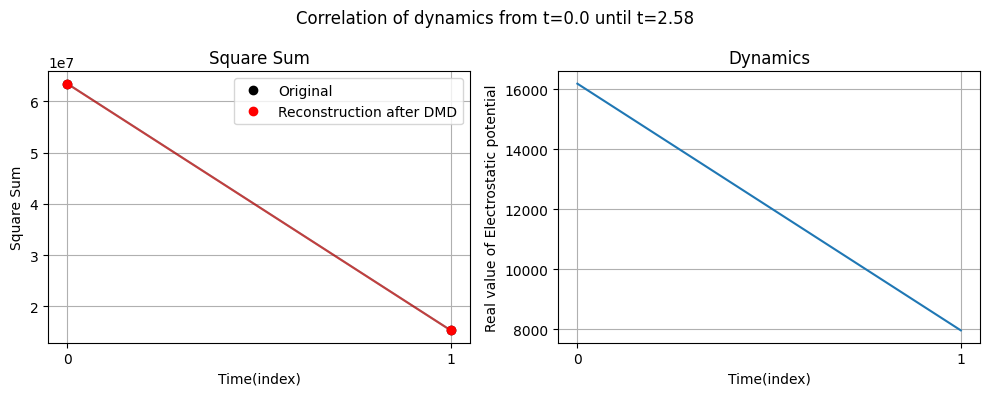

In [55]:
df_test = draw_pearson_corr(0, 2)
df_test.style.applymap(draw_color)

In [56]:
df_test = draw_pearson_corr(0, 3)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=5.16


In [57]:
df_test = draw_pearson_corr(0, 4)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=7.73


In [58]:
df_test = draw_pearson_corr(0, 5)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=10.31


In [59]:
df_test = draw_pearson_corr(0, 6)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=12.89


In [60]:
df_test = draw_pearson_corr(0, 7)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=15.47


Correlation of dynamics from t=0.0 until t=17.92


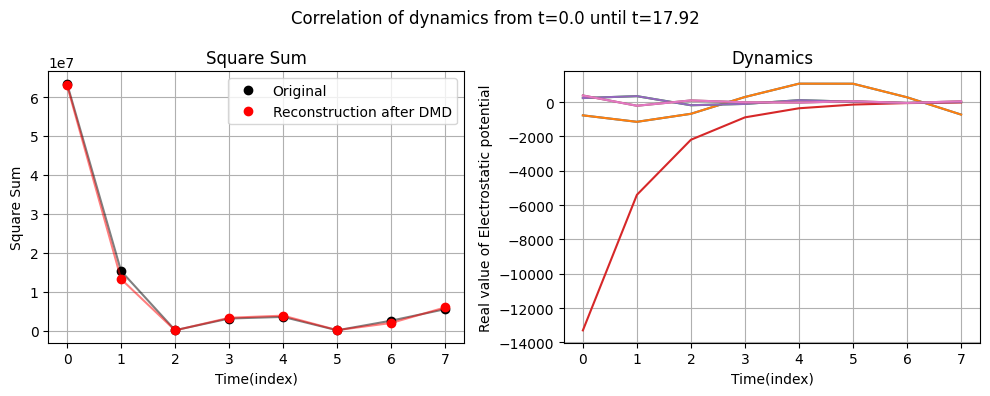

In [61]:
df_test = draw_pearson_corr(0, 8)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=20.2


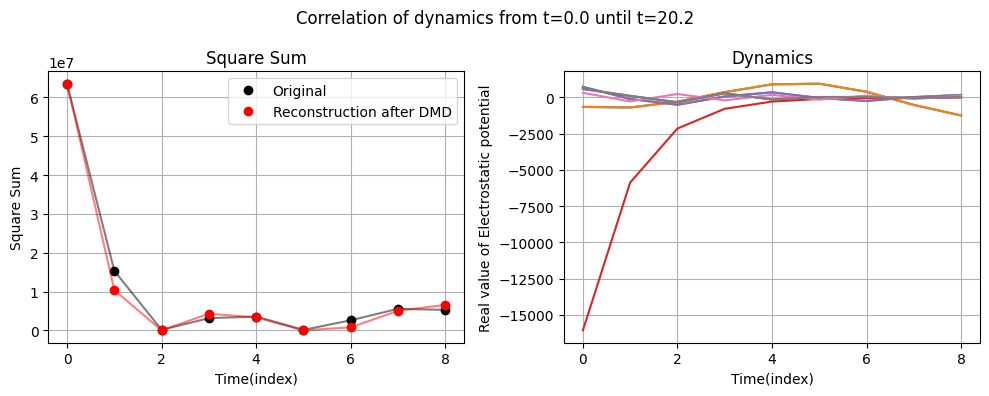

In [62]:
df_test = draw_pearson_corr(0, 9)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=22.3


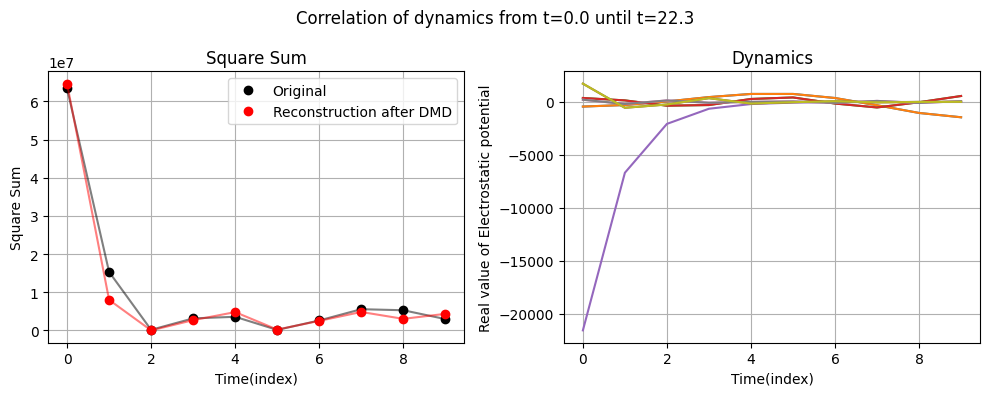

In [63]:
df_test = draw_pearson_corr(0, 10)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=24.28


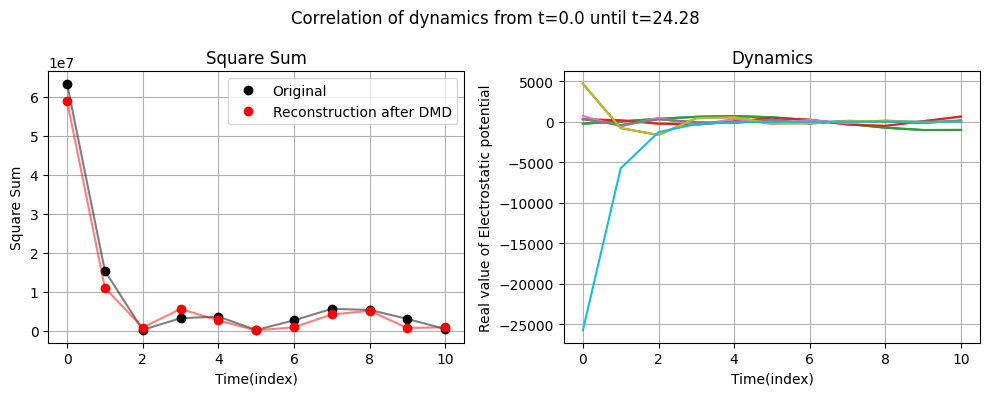

In [64]:
df_test = draw_pearson_corr(0, 11)
df_test.style.applymap(draw_color)

In [65]:
df_test = draw_pearson_corr(0, 12)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=26.21


Correlation of dynamics from t=0.0 until t=28.0


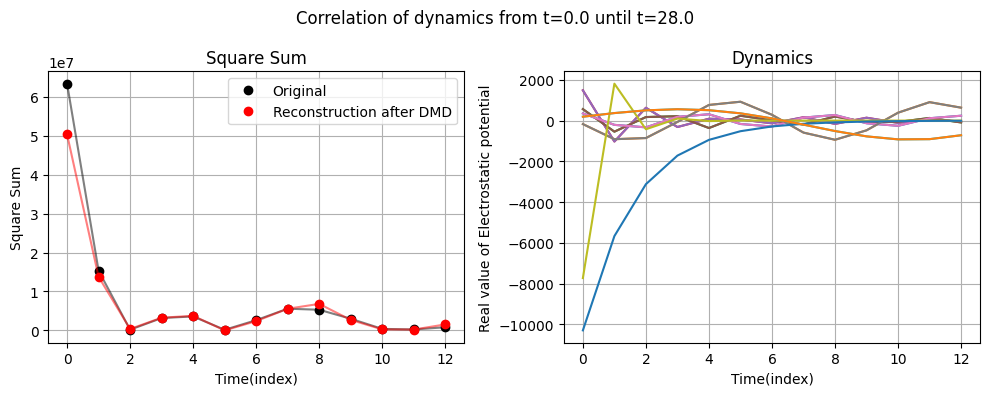

In [66]:
df_test = draw_pearson_corr(0, 13)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=29.67


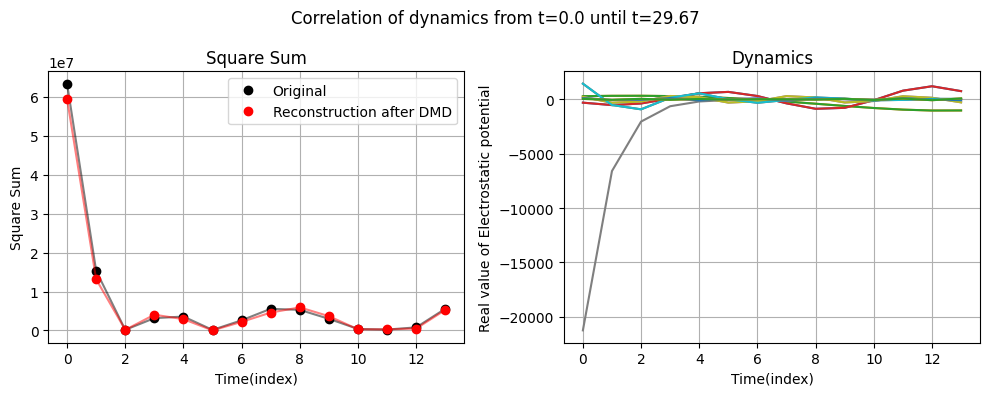

In [67]:
df_test = draw_pearson_corr(0, 14)
df_test.style.applymap(draw_color)

In [68]:
df_test = draw_pearson_corr(0, 15)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=31.28


Correlation of dynamics from t=0.0 until t=34.53


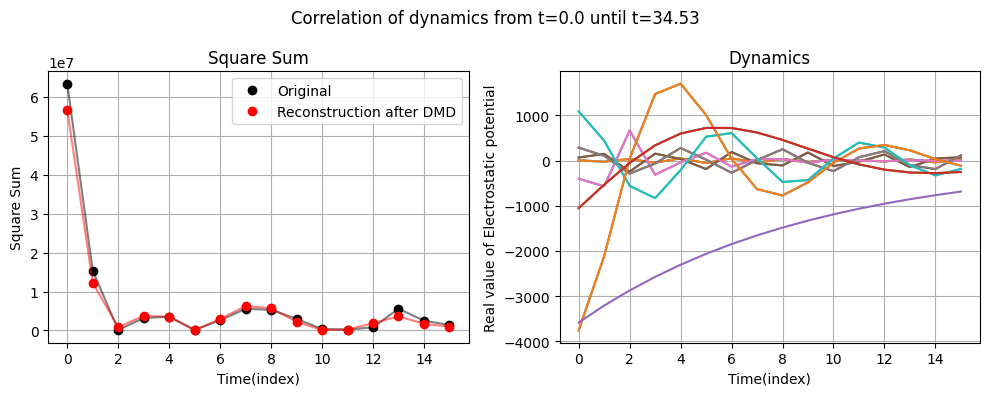

In [33]:
df_test = draw_pearson_corr(0, 16)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=36.25


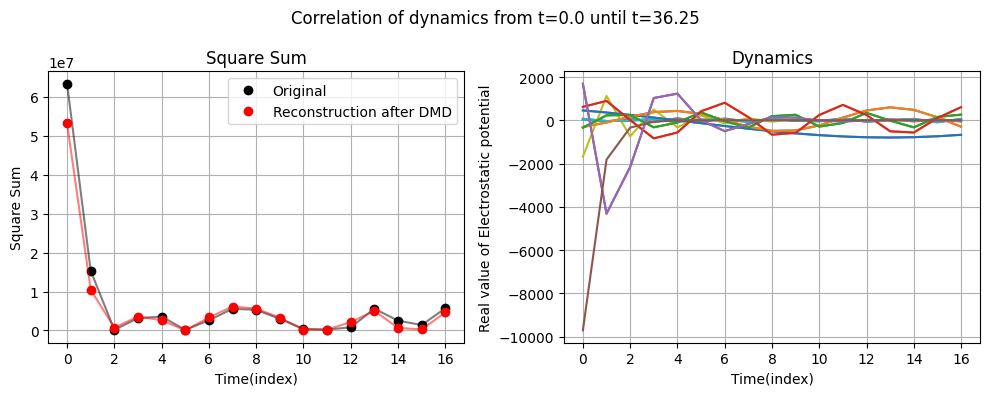

In [34]:
df_test = draw_pearson_corr(0, 17)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=36.25


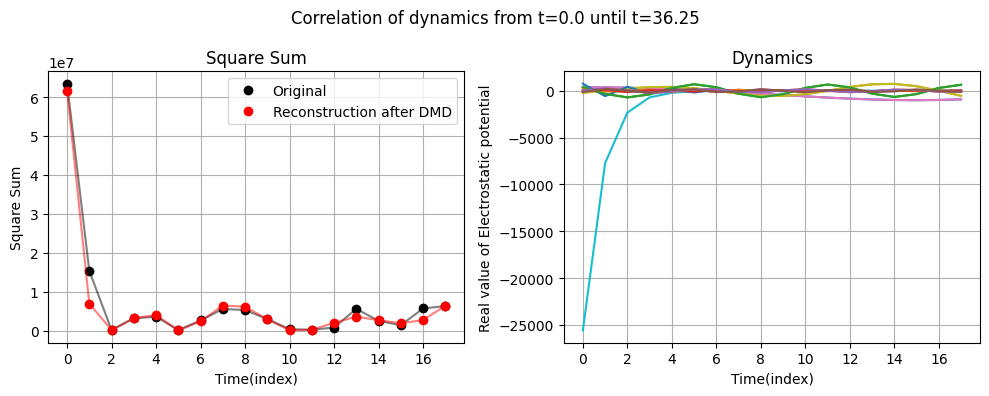

In [69]:
df_test = draw_pearson_corr(0, 18)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=38.02


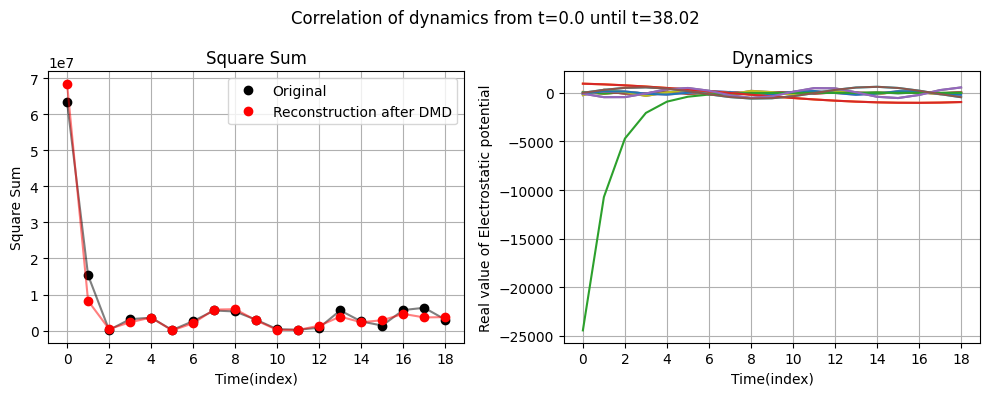

In [70]:
df_test = draw_pearson_corr(0, 19)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=39.82


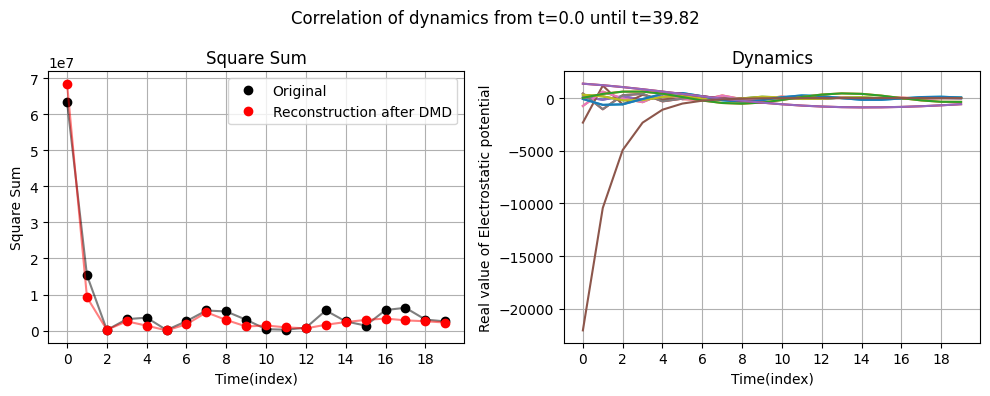

In [71]:
df_test = draw_pearson_corr(0, 20)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=58.97


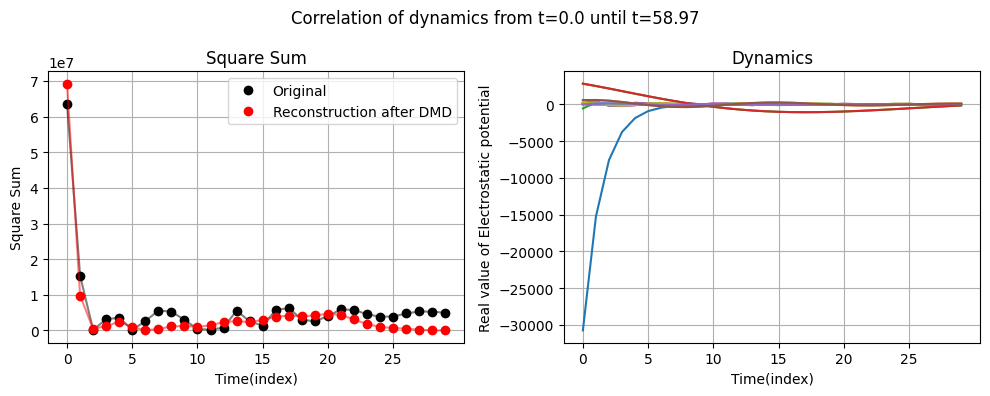

In [76]:
df_test = draw_pearson_corr(0, 30)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=193.91


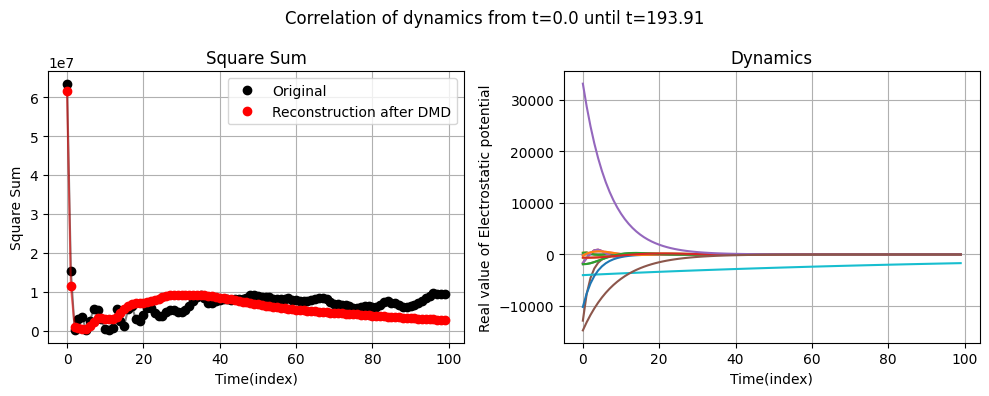

In [77]:
df_test = draw_pearson_corr(0, 100)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=1777.67


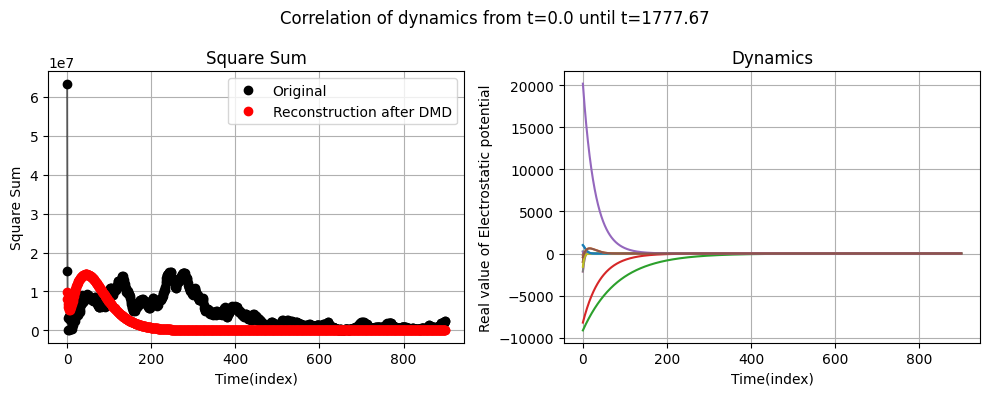

In [40]:
df_test = draw_pearson_corr(0, 900)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=0.0 until t=3673.52


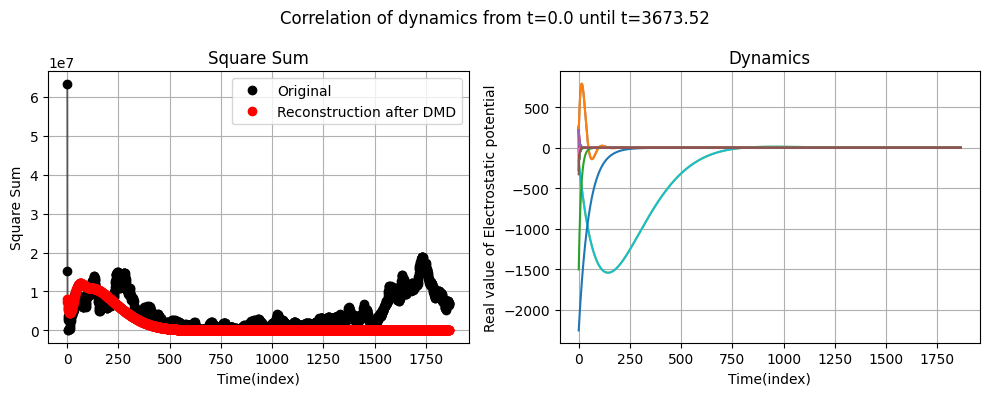

In [43]:
# For whole data
df_test = draw_pearson_corr(0, 1866)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=1777.67 until t=1817.64


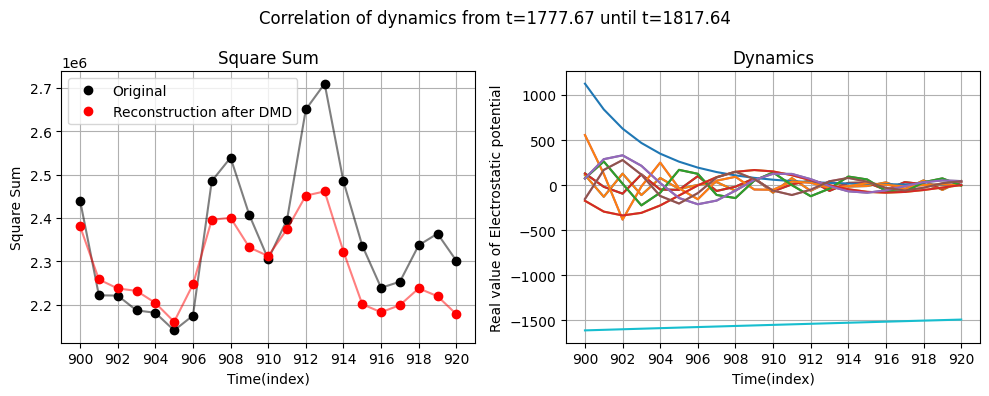

In [72]:
df_test = draw_pearson_corr(900, 921)
df_test.style.applymap(draw_color)

In [73]:
df_test = draw_pearson_corr(1845, 1866)
df_test.style.applymap(draw_color)

Correlation of dynamics from t=3634.17 until t=3673.52


#### 3. Apply SINDy

In [ ]:
####################################
# Apply SINDy to obtained dynamics #
####################################

fourier_library = ps.FourierLibrary(n_frequencies=2)
nlinear_sindy = ps.SINDy(feature_library=fourier_library)
print(linear_sindy)

timestep_rsd = np.arange(rsd)

X_rsd = np.stack([nl_dynamics.real[0], nl_dynamics.real[2]])

nlinear_sindy.fit(X_rsd.T, t=timestep_rsd)
nlinear_sindy.print()

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x0', 'x1'],
      optimizer=STLSQ())
(x0)' = 5.784 sin(1 x0) + 5.949 cos(1 x0) + -8.433 sin(1 x1) + -16.789 cos(1 x1) + 25.978 sin(2 x0) + -35.943 cos(2 x0) + 16.765 sin(2 x1) + 19.295 cos(2 x1)
(x1)' = 4.096 sin(1 x0) + 3.540 cos(1 x0) + 4.114 sin(1 x1) + 13.697 cos(1 x1) + 5.162 sin(2 x0) + 18.240 cos(2 x0) + -11.195 sin(2 x1) + -0.932 cos(2 x1)


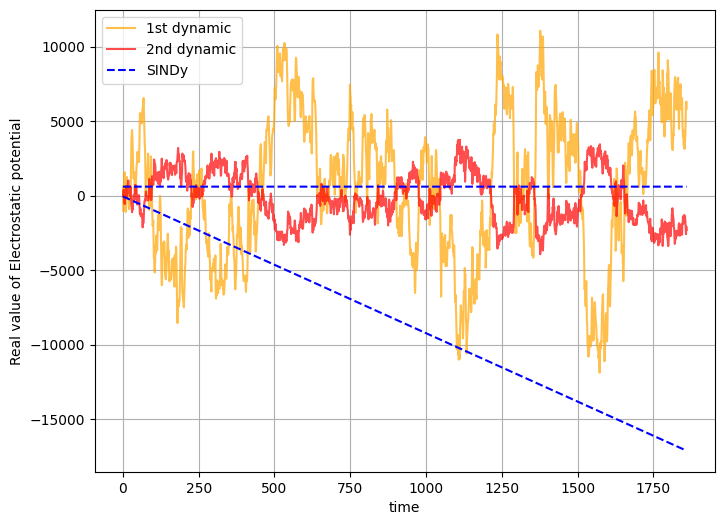

In [ ]:
# Tooks about 30min
nl_sim = nlinear_sindy.simulate(X_rsd.T[0, :], timestep_rsd)

plt.figure(figsize=(8, 6))
plt.plot(X_rsd[0, :], '-', color='orange', alpha=0.7, label='1st dynamic')
plt.plot(X_rsd[1, :], 'r-', alpha=0.7, label='2nd dynamic')
plt.plot(nl_sim[:, 0], 'b--', label='SINDy')
plt.plot(nl_sim[:, 1], 'b--')
#plt.xticks(np.arange(rsd), labels=np.round(t[time_slc:], 2))
plt.xlabel('time')
plt.ylabel('Real value of Electrostatic potential')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(17, 3))

plt.subplot(1, 3, 1)
plt.plot(nl_sim[:, 0], '-', color='orange')
plt.xlabel('time')
plt.ylabel('Electrostatic potential')
plt.title('SINDy-1st dynamics')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(nl_sim[:, 1], 'r-')
plt.xlabel('time')
plt.ylabel('Electrostatic potential')
plt.title('SINDy-2nd dynamics')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(nl_sim[:, 0], '-', color='orange', label='SINDy-1st dynamics')
plt.plot(nl_sim[:, 1], 'r-', label='SINDy-2nd dynamics')
plt.xlabel('time')
plt.ylabel('Electrostatic potential')
plt.legend()
plt.grid()

plt.tight_layout()

In [ ]:
plt.figure(figsize=(17, 3))
plt.plot(nl_sim[:, 0], '-', color='orange')
plt.xlabel('time')
plt.ylabel('Electrostatic potential')
plt.title('SINDy-1st dynamics')
plt.grid()

In [ ]:
def mvw(original_data, window_size=20):
  avg_data = np.zeros(original_data.shape, dtype=float)  # (1866, 32, 96)
  for index in range(original_data.shape[0]):
    if index < window_size:
      temp = np.zeros(original_data.shape[1:], dtype=float)
      for j in range(index+1):
        temp += original_data[j]
      avg_data[index] = temp/(index+1)
    else:
      temp = np.zeros(original_data.shape[1:], dtype=float)
      for j in range(window_size):
        temp += original_data[index-j]
      avg_data[index] = temp/window_size
  return avg_data

(1861, 2)


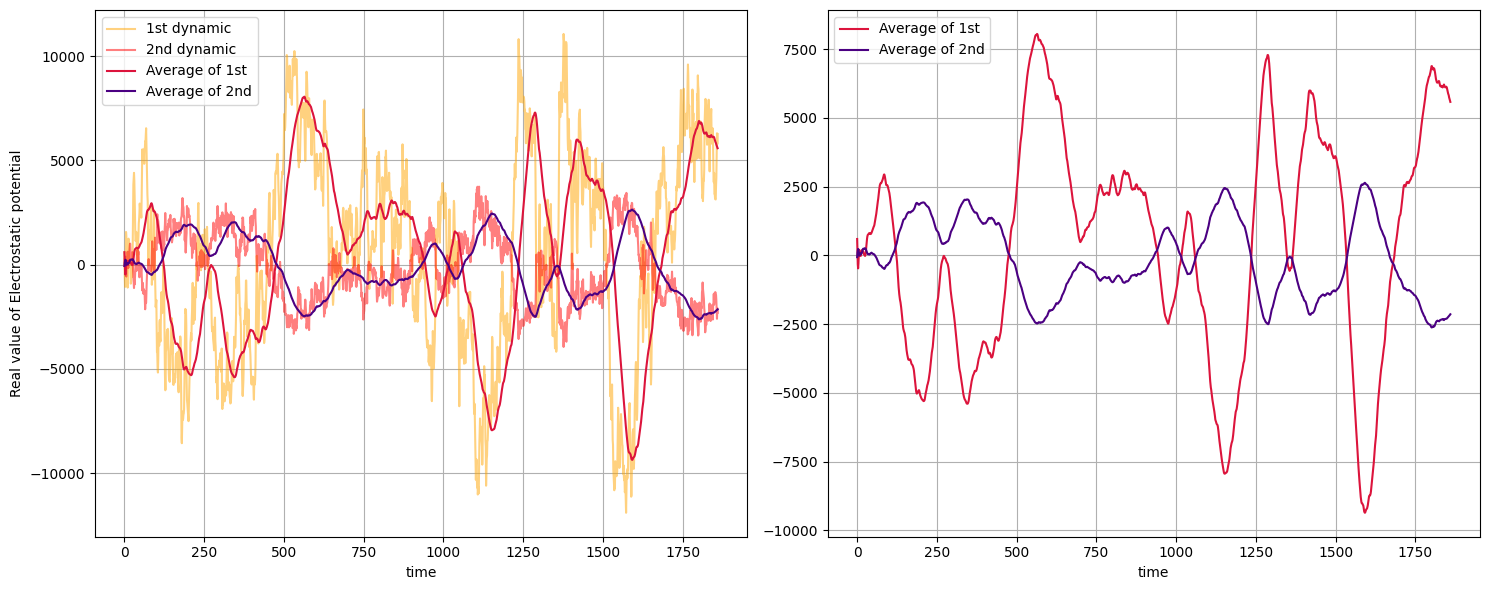

In [ ]:
avg_X_rsd = mvw(X_rsd.T, 60)
print(avg_X_rsd.shape)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(X_rsd[0, :], '-', color='orange', alpha=0.5, label='1st dynamic')
plt.plot(X_rsd[1, :], 'r-', alpha=0.5, label='2nd dynamic')
plt.plot(avg_X_rsd[:, 0], '-', color='crimson', label='Average of 1st')
plt.plot(avg_X_rsd[:, 1], '-', color='indigo', label='Average of 2nd')
plt.xlabel('time')
plt.ylabel('Real value of Electrostatic potential')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(avg_X_rsd[:, 0], '-', color='crimson', label='Average of 1st')
plt.plot(avg_X_rsd[:, 1], '-', color='indigo', label='Average of 2nd')
plt.xlabel('time')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()

https://pysindy.readthedocs.io/en/latest/api/pysindy.optimizers.html

In [ ]:
####################################
# Apply SINDy to averaged dynamics #
####################################

fourier_library = ps.FourierLibrary(n_frequencies=4)
#optimizer = ps.STLSQ(threshold=0.0002)
optimizer = ps.optimizers.FROLS()
anlinear_sindy = ps.SINDy(feature_library=fourier_library)
print(anlinear_sindy)

timestep_rsd = np.arange(rsd)

anlinear_sindy.fit(avg_X_rsd, t=timestep_rsd)
anlinear_sindy.print()

SINDy(differentiation_method=FiniteDifference(axis=-2),
      feature_library=<pysindy.feature_library.fourier_library.FourierLibrary object at 0x7d150e1b8760>,
      optimizer=STLSQ())
(x0)' = -4.305 sin(1 x0) + -3.030 cos(1 x0) + -4.802 cos(1 x1) + 1.197 sin(2 x0) + -3.094 cos(2 x0) + -3.329 sin(2 x1) + 2.378 cos(2 x1) + -4.074 sin(3 x0) + 1.246 cos(3 x0) + 1.440 sin(3 x1) + -0.834 cos(3 x1) + 1.465 sin(4 x0) + -0.827 cos(4 x0) + 1.337 sin(4 x1) + 4.832 cos(4 x1)
(x1)' = 1.548 sin(1 x0) + 0.620 cos(1 x0) + 1.507 cos(1 x1) + -0.253 sin(2 x0) + 0.918 cos(2 x0) + 1.050 sin(2 x1) + -0.779 cos(2 x1) + 1.404 sin(3 x0) + -0.453 cos(3 x0) + -0.277 sin(3 x1) + 0.271 cos(3 x1) + -0.417 sin(4 x0) + 0.245 cos(4 x0) + -0.219 sin(4 x1) + -1.876 cos(4 x1)


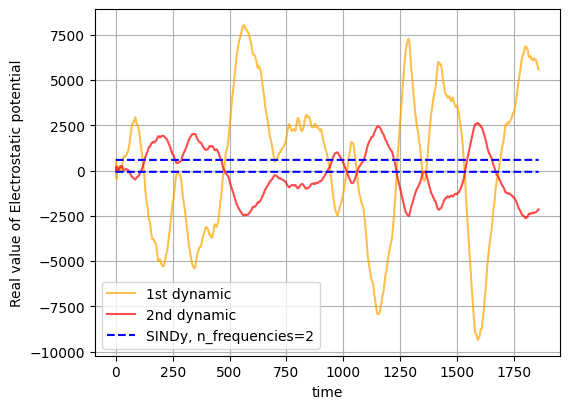

In [ ]:
# Tooks about 1 min
anl_sim = anlinear_sindy.simulate(avg_X_rsd[0, :], timestep_rsd)

plt.figure(figsize=(6, 4.5))
plt.plot(avg_X_rsd.T[0, :], '-', color='orange', alpha=0.7, label='1st dynamic')
plt.plot(avg_X_rsd.T[1, :], 'r-', alpha=0.7, label='2nd dynamic')
plt.plot(anl_sim[:, 0], 'b--', label='SINDy, n_frequencies=2')
plt.plot(anl_sim[:, 1], 'b--')
plt.xlabel('time')
plt.ylabel('Real value of Electrostatic potential')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Tooks about 5 sec
anl_sim = anlinear_sindy.simulate(avg_X_rsd[0, :], timestep_rsd)

plt.figure(figsize=(6, 4.5))
plt.plot(avg_X_rsd.T[0, :], '-', color='orange', alpha=0.7, label='1st dynamic')
plt.plot(avg_X_rsd.T[1, :], 'r-', alpha=0.7, label='2nd dynamic')
plt.plot(anl_sim[:, 0], 'b--', label='SINDy, n_frequencies=4')
plt.plot(anl_sim[:, 1], 'b--')
plt.xlabel('time')
plt.ylabel('Real value of Electrostatic potential')
plt.legend()
plt.grid()
plt.show()

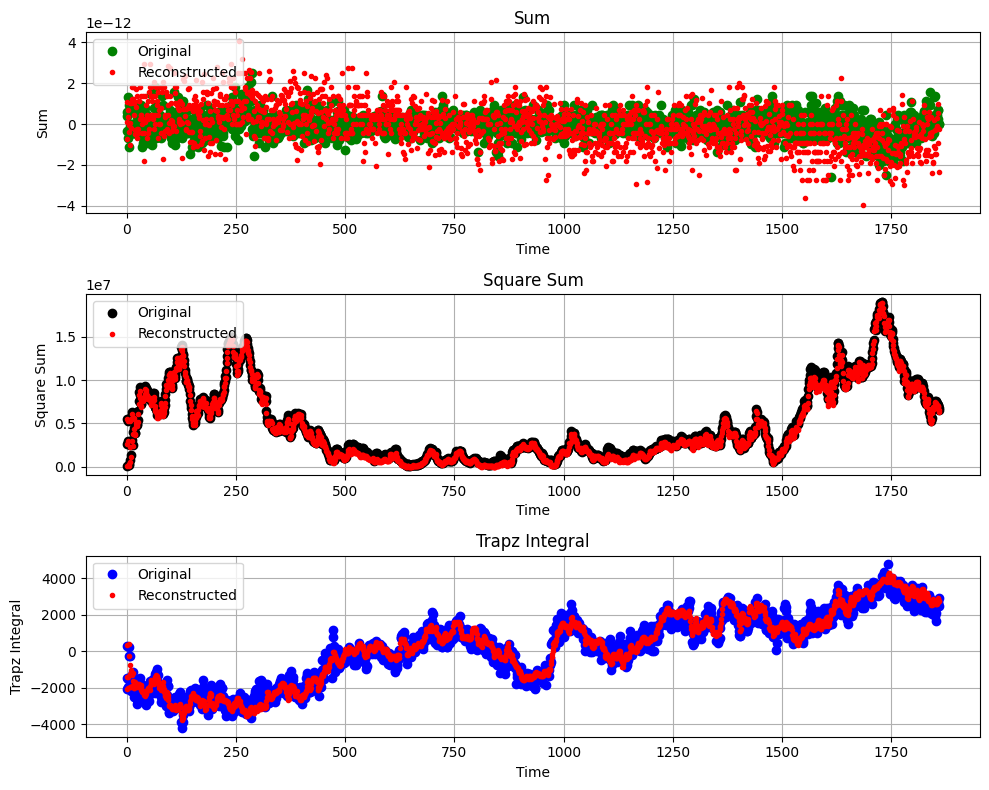

In [ ]:
import scipy
import scipy.integrate

rct_nl_X = l_modes@nl_dynamics  # (3072, rsd)
compute_integral = scipy.integrate.trapz

sum_int = [np.sum(array.real) for array in nonlinear_part]
ssum_int = [np.sum(np.square(array).real) for array in nonlinear_part]
trapz_int = [compute_integral(compute_integral(array)).real for array in nonlinear_part]
rct_sum = [np.sum(array.real) for array in rct_nl_X.T]
rct_ssum = [np.sum(np.square(array).real) for array in rct_nl_X.T]
rct_states = [state.reshape((32, 96)) for state in rct_nl_X.T]
rct_trapz = [compute_integral(compute_integral(state)).real for state in rct_states]

figure = plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(np.arange(rsd), sum_int, 'go', label='Original')
plt.plot(np.arange(rsd), rct_sum, 'r.', label='Reconstructed')
plt.ylabel('Sum')
plt.xlabel('Time')
plt.title('Sum')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(np.arange(rsd), ssum_int, 'ko', label='Original')
plt.plot(np.arange(rsd), rct_ssum, 'r.', label='Reconstructed')
plt.ylabel('Square Sum')
plt.xlabel('Time')
plt.title('Square Sum')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(np.arange(rsd), trapz_int, 'bo', label='Original')
plt.plot(np.arange(rsd), rct_trapz, 'r.', label='Reconstructed')
plt.ylabel('Trapz Integral')
plt.xlabel('Time')
plt.title('Trapz Integral')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()